In [1]:
# 文件读取与存储

我们的数据大部分存在于文件当中，所以pandas会支持复杂的IO操作，pandas的API支持众多的文件格式，如CSV、SQL、XLS、JSON、HDF5。

> 注：最常用的HDF5和CSV文件
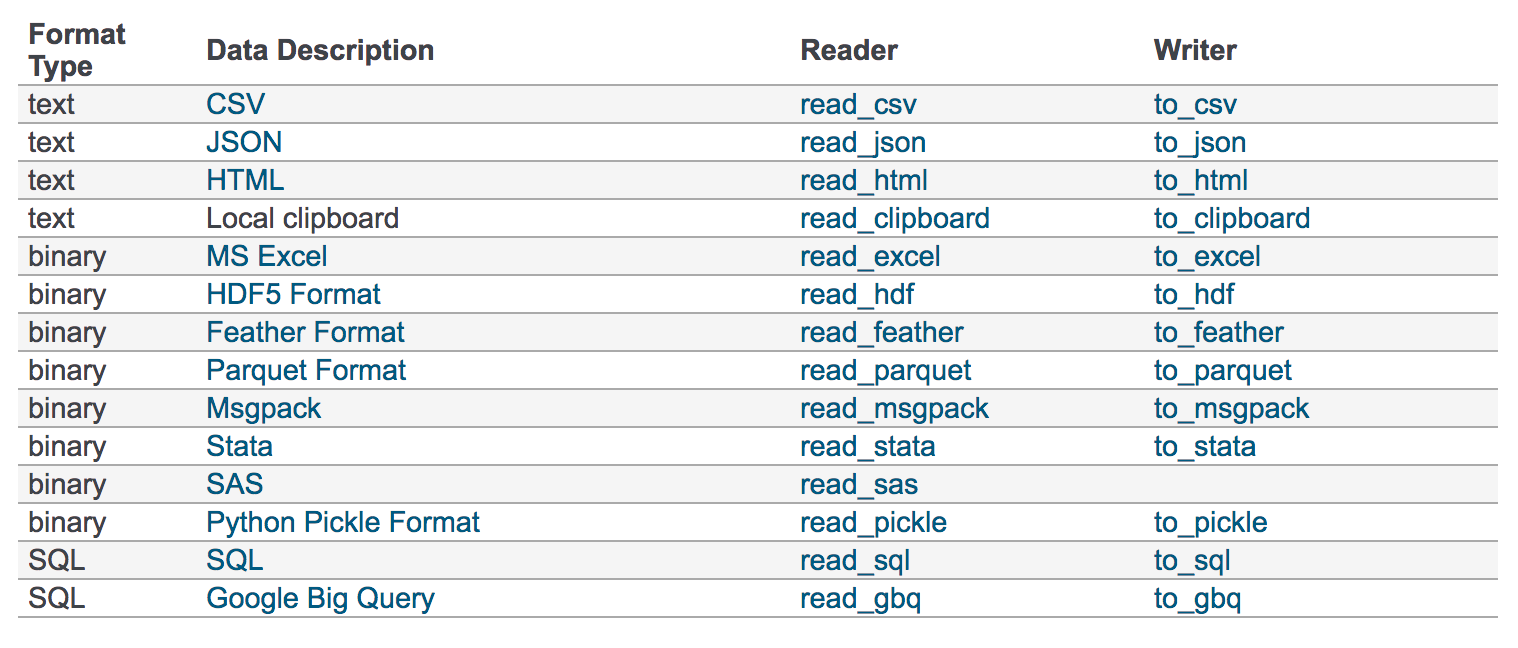

# CSV
## read_csv
- pandas.read_csv(filepath_or_buffer, sep =',', usecols )
    - filepath_or_buffer:文件路径
    - sep :分隔符，默认用","隔开
    - usecols:指定读取的列名，列表形式

- 举例：读取之前的股票的数据

In [2]:
# 读取文件,并且指定只获取'open', 'close'指标
import pandas as pd
data = pd.read_csv("./stock_day.csv",usecols=['open','close'])
data.head()

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92


## to_csv

- DataFrame.to_csv(path_or_buf=None, sep=', ’, columns=None, header=True, index=True, mode='w', encoding=None)
    - path_or_buf :文件路径
    - sep :分隔符，默认用","隔开
    - columns :选择需要的列索引
    - header :boolean or list of string, default True,是否写进列索引值
    - index:是否写进行索引
    - mode:'w'：重写, 'a' 追加

- 举例：保存读取出来的股票数据
    - 保存'open'列的数据，然后读取查看结果


In [3]:
# 选取10行数据保存,便于观察数据
data[:10].to_csv("./test.csv",columns=['open'])

In [4]:
# 读取，查看结果
pd.read_csv("./test.csv")

,Unnamed: 0,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


会发现将索引存入到文件当中，变成单独的一列数据。如果需要删除，可以指定index参数,删除原来的文件，重新保存一次。

In [6]:
# index:存储不会讲索引值变成一列数据
data[:10].to_csv("./test.csv",columns=['open'],index=False)
pd.read_csv("./test.csv")

,open
0,23.53
1,22.80
2,22.88
3,22.25
4,21.49
5,21.40
6,20.70
7,21.20
8,21.79
9,22.69


# HDF5
## read_hdf与to_hdf
**HDF5文件的读取和存储需要指定一个键，值为要存储的DataFrame**
- pandas.read_hdf(path_or_buf，key =None，** kwargs)
 
 从h5文件当中读取数据
    - path_or_buffer:文件路径
    - key:读取的键
    - return:Theselected object
 
- DataFrame.to_hdf(path_or_buf, key, *\kwargs*)

## 案例
- 读取文件

In [3]:
day_close = pd.read_hdf("./day_close.h5")

- 存储文件

In [11]:
day_close.to_hdf("./test.hd5",key="day_close")

再次读取的时候，需要指定键的名字

In [ ]:
new_close = pd.read_hdf("./test.hd5",key="day_close")

**注意：优先选择使用HDF5文件存储**

- HDF5在存储的时候支持压缩，使用的方式是blosc，这个是速度最快的也是pandas默认支持的
- 使用压缩可以提磁盘利用率，节省空间
- HDF5还是跨平台的，可以轻松迁移到hadoop 上面

# Json
JSON是我们常用的一种数据交换格式，前面在前后端的交互经常用到，也会在存储的时候选择这种格式。所以我们需要知道Pandas如何进行读取和存储JSON格式。
##  read_json
- pandas.read_json(path_or_buf=None, orient=None, typ='frame', lines=False)
    - 将JSON格式准换成默认的Pandas DataFrame格式
    - orient : string,Indication of expected JSON string format. 
        - 'split' : dict like {index -> [index], columns -> [columns], data -> [values]}
            - split 将索引总结到索引，列名到列名，数据到数据。将三部分都分开了
        - 'records' : list like [{column -> value}, ... , {column -> value}]
            - records 以columns：values的形式输出
        - 'index' : dict like {index -> {column -> value}}
            - index 以index：{columns：values}...的形式输出
        - 'columns' : dict like {column -> {index -> value}},默认该格式
            - colums 以columns:{index:values}的形式输出
        - 'values' : just the values array
            - values 直接输出值
    - lines : boolean, default False
        - 按照每行读取json对象
    - typ : default ‘frame’， 指定转换成的对象类型series或者dataframe

## read_json案例
- 数据介绍
这里使用一个新闻标题讽刺数据集，格式为json。is_sarcastic：1讽刺的，否则为0；headline：新闻报道的标题；article_link：链接到原始新闻文章。存储格式为：

In [ ]:
{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0}
{"article_link": "https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365", "headline": "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "is_sarcastic": 0}

- 读取

orient指定存储的json格式，lines指定按照行去变成一个样本

In [6]:
json_read = pd.read_json("./Sarcasm_Headlines_Dataset.json",orient="records",lines=True)
json_read

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


## to_json
- DataFrame.to_json(path_or_buf=None, orient=None, lines=False)
    - 将Pandas 对象存储为json格式
    - path_or_buf=None：文件地址
    - orient:存储的json形式，{‘split’,’records’,’index’,’columns’,’values’}
    - lines:一个对象存储为一行

## 案例

In [17]:
# 存储文件
json_read.to_json("./test.json",orient="records")
# 修改lines参数为True
json_read.to_json("./test.json", orient='records', lines=True)

# 小结
- pandas的CSV、HDF5、JSON文件的读取【知道】
    - 对象.read_**()
    - 对象.to_**()